In [ ]:
# Install Watson library
#
!pip install --upgrade watson-developer-cloud

In [24]:
# Get the apikey for the Visual Recognition service instance:
# 1. From the *Services* menu in Watson Studio ( ^^ ) right-click "Watson Services" and then open the link in a new browser tab
# 2. In the new Watson services tab, click the service instance in the Visual Recognition list
# 3. In the "Credentials" tab, expand credentials and then copy the apikey
#
apikey = '' # <-- PASTE YOUR APIKEY HERE

In [25]:
# Get the ID of the trained Visual Recognition custom model:
# 1. From the *Services* menu in Watson Studio ( ^^ ) right-click "Watson Services" and then open the link in a new browser tab
# 2. In the new Watson services tab, click the service instance in the Visual Recognition list
# 3. In the "Overview" tab, scroll down to the list of your custom models and then click "Copy model ID"
#
model_id = '' # <-- PASTE YOUR MODEL ID HERE

In [26]:
# Instantiate a visual recognition object
#
from watson_developer_cloud import VisualRecognitionV3
visual_recognition = VisualRecognitionV3( version='2018-03-19', iam_apikey=apikey )

In [27]:
# Sample spectrograms for testing your trained model
#
url_1 = 'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/cat-translator/test-data/cat-door-test_01.png'
url_2 = 'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/cat-translator/test-data/cat-door-test_02.png'
url_3 = 'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/cat-translator/test-data/cat-food-test_01.png'
url_4 = 'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/cat-translator/test-data/cat-food-test_02.png'

Text(0.5,1,'url_4: cat-food-test_02.png')

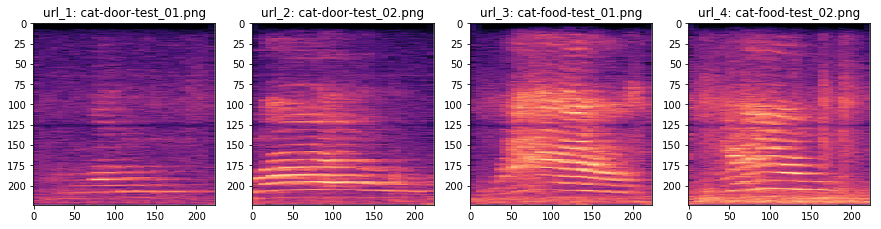

In [37]:
# View the test spectrograms
#
from skimage import io
import matplotlib.pyplot as plt
import re
fig, axs = plt.subplots( 1, 4, figsize=( 15, 60 ) )
axs[0].imshow( io.imread(url_1) )
axs[1].imshow( io.imread(url_2) )
axs[2].imshow( io.imread(url_3) )
axs[3].imshow( io.imread(url_4) )
axs[0].set_title( 'url_1: ' + re.sub( '.*\/', '', url_1 ) )
axs[1].set_title( 'url_2: ' + re.sub( '.*\/', '', url_2 ) )
axs[2].set_title( 'url_3: ' + re.sub( '.*\/', '', url_3 ) )
axs[3].set_title( 'url_4: ' + re.sub( '.*\/', '', url_4 ) )
for img in axs:
    img.set_xticks([])
    img.set_yticks([])


In [38]:
# Classify the test spectrograms
#
# *Change the url parameter (url_2, url_3, url_4) to test the different sample spectrograms
#
import json
results = visual_recognition.classify( url=url_1, threshold='0', classifier_ids=model_id ).get_result()
print( json.dumps( results, indent=2 ) )

{
  "images": [
    {
      "source_url": "https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/cat-translator/test-data/cat-door-test_01.png",
      "resolved_url": "https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/cat-translator/test-data/cat-door-test_01.png",
      "classifiers": [
        {
          "classifier_id": "catxinterpreter_502914591",
          "name": "cat-interpreter",
          "classes": [
            {
              "score": 0.005,
              "class": "feedme"
            },
            {
              "score": 0.92,
              "class": "opendoor"
            }
          ]
        }
      ]
    }
  ],
  "custom_classes": 2,
  "images_processed": 1
}
